**Task: We have the following data regarding the revenue (in thousand dollars), returned by several technologies in a country. How we can estimate the missing points, using polynomial interpolation?**

**By Kurosh Karimi**

In [1]:
# Columns represent years
headers = ['2010', '2011', '2012','2013', '2014', '2015', '2016']

# Rows represent Technology Categories
rows = ['Technology1', 'Technology2', 'Technology3', 'Technology4', 'Technology5']

# Each row in the matrix below represent one Technology and each column one Year of data
data = [
    [577.470,	584.593,	 618.988,	 None,  	 740.693,	 820.916,	 914.72],
    [2697.189,	3249.978,    None,       3420.256,	 3492.421,	 3538.651,	3567.47],
    [2700.082,	2728.529,	 2996.001,	 3386.340,	    None,	 4315.841,	4887.348],
    [1656.779,	1754.627,	 1931.514,	 2125.143,	 2337.725,	 2581.181,	2862.201],
    [3288.570,	3301.79,	 3342.249,	 None,    3455.419,	 3502.868,	3544.409]
]

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

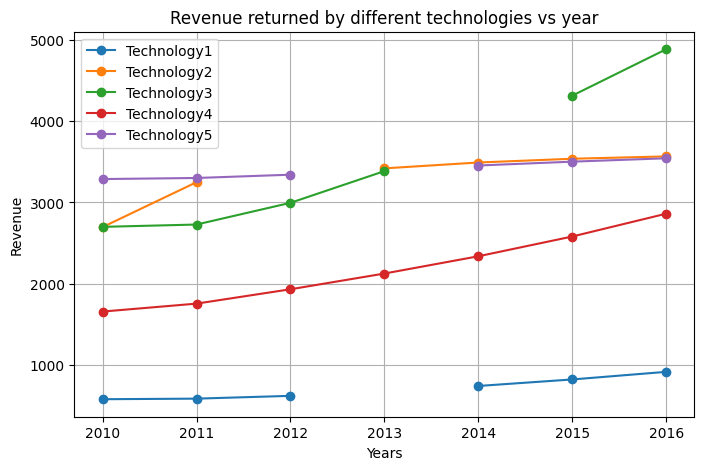

In [8]:
 # The data shows the revenue belonging to different technologies  vs year.
 # To better understanding  the data, I plot the spending categories against year to see their trends:

# Changing the test data type to data frame and rename it to 'test'
test = pd.DataFrame(data)

# Adding the column and row headers to the 'test' data frame
test.columns = headers
test.index = rows

# Visualization of the spending technology category variation vs year
plt.figure(figsize = (8, 5))
for row in range(len(rows)):
    test.iloc[row,:].plot(marker = 'o')
    
plt.legend(rows)
plt.grid()
plt.title('Revenue returned by different technologies vs year')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.show()


Filling in the missing values is strongly dependent on the dataset in hand and may vary case to case.
Considering the rising trends of the technology revenues with year, one of the most efficient approaches could be row interpolation of the  data. I present two interpolating solutions: (1) linear interpolation, using the Pandas' linear interpolate() method, (2) polynomial interpolation method, where instead of using 'polynomial' mode of pandas' library, I take advantage of polyfit() method to create a degree 2 polynomial fit and estimate the missing values from it.

(1) First solution: filling the null cells using Pandas' linear interpolate() method

In [4]:

test_interp = test.interpolate(method='linear', axis=1)

print("Interpolated Missing Data Using Pandas:\n")
test_interp



Interpolated Missing Data Using Pandas:



,2010,2011,2012,2013,2014,2015,2016
Technology1,577.470,584.593,618.988,679.8405,740.6930,820.916,914.720
Technology2,2697.189,3249.978,3335.117,3420.2560,3492.4210,3538.651,3567.470
Technology3,2700.082,2728.529,2996.001,3386.3400,3851.0905,4315.841,4887.348
Technology4,1656.779,1754.627,1931.514,2125.1430,2337.7250,2581.181,2862.201
Technology5,3288.570,3301.790,3342.249,3398.8340,3455.4190,3502.868,3544.409


(2) Second Solution: Using degree 2 polynomial fit

In [5]:
# Columns represent years
headers = ['2010', '2011', '2012','2013', '2014', '2015', '2016']

# Rows represent Technology Categories
rows = ['Technology1', 'Technology2', 'Technology3', 'Technology4', 'Technology5']

# Each row in the matrix below represent one Technology and each column one Year of data
data = [
    [577.470,	584.593,	 618.988,	 None,  	 740.693,	 820.916,	 914.72],
    [2697.189,	3249.978,    None,       3420.256,	 3492.421,	 3538.651,	3567.47],
    [2700.082,	2728.529,	 2996.001,	 3386.340,	    None,	 4315.841,	4887.348],
    [1656.779,	1754.627,	 1931.514,	 2125.143,	 2337.725,	 2581.181,	2862.201],
    [3288.570,	3301.79,	 3342.249,	 None,    3455.419,	 3502.868,	3544.409]
]

In [6]:
# Since I need the 'headers' components as integers later on, I convert them from string to integer element
int_column_header = list(map(int, headers))

# I again compose the dataframe and name it 'test_poly'
test_poly = pd.DataFrame(data, index = rows, columns = int_column_header)

# I create a 'for' loop iterating over the rows of 'test_poly' data frame.
# I extract the year related to the null cells and then drop the cell using dropna() method.
# Following this, I calculate the degree 2 polynomial of rows and get the amount of the null
# cell from the polynomial equation
def get_year(r):
    '''
    get_year() method gets the row 'r' and returns the year pertaining to the null value
    '''
    year = test_poly.loc[r, :].index[test_poly.loc[r, :].isna()]
    return year
    

for row_content in rows:
    if get_year(row_content).size > 0:
        row = test_poly.loc[row_content, :].dropna()
        x = row.index.values
        y = row.values
        p = np.polyfit(x, y, 2)
        polynomial_fit = np.poly1d(p)
        y_hat = polynomial_fit(get_year(row_content)[0])
        test_poly.loc[row_content, :].fillna(y_hat, inplace= True)

test_poly

,2010,2011,2012,2013,2014,2015,2016
Technology1,577.470,584.593,618.9880,670.730929,740.6930,820.916,914.720
Technology2,2697.189,3249.978,3300.9121,3420.256000,3492.4210,3538.651,3567.470
Technology3,2700.082,2728.529,2996.0010,3386.340000,3769.6599,4315.841,4887.348
Technology4,1656.779,1754.627,1931.5140,2125.143000,2337.7250,2581.181,2862.201
Technology5,3288.570,3301.790,3342.2490,3395.287429,3455.4190,3502.868,3544.409


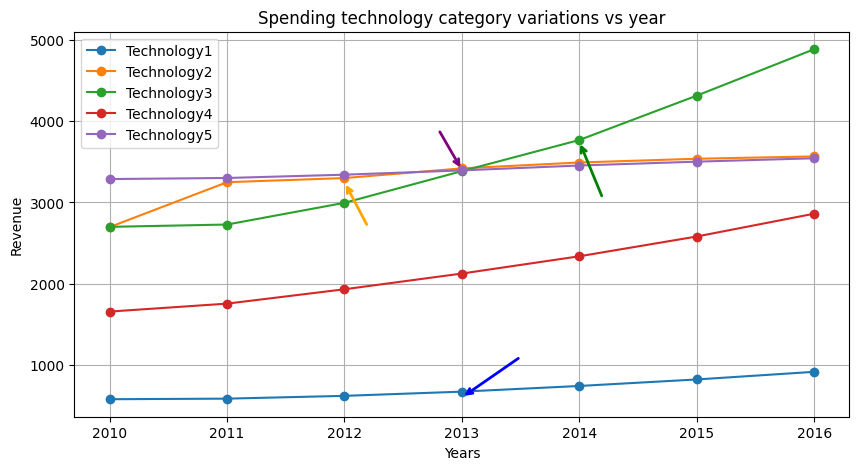

In [9]:
# Again, I plot the technology trends with the filled points shown in blue arrows!

plt.figure(figsize = (10, 5))
for row in range(len(rows)):
    test_poly.iloc[row, :].plot(marker='o')

plt.legend(rows)
plt.title('Spending technology category variations vs year')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Revenue')

plt.annotate('', xy=(2013, 3400), xytext=(2012.8, 3900), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
             color='purple', lw=2))

plt.annotate('', xy=(2012, 3250), xytext=(2012.2, 2700), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
             color='orange', lw=2))

plt.annotate('', xy=(2013, 600), xytext=(2013.5, 1100), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
             color='blue', lw=2))

plt.annotate('', xy=(2014, 3750), xytext=(2014.2, 3050), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
             color='green', lw=2))
plt.show()